# Introduction to regression and classificiation

### Imports for this lesson

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression

In [18]:
# load dataset
X = np.loadtxt("data/linear_regression/weight.csv", delimiter=",")
y = np.loadtxt("data/linear_regression/height.csv", delimiter=",")
print(f"First 5 weight: {X[:5]}")
print(f"First 5 height: {y[:5]}")

First 5 weight: [109.72098511  73.62273185  96.49755015  99.80950419  93.59861876]
First 5 height: [1.87571423 1.74706036 1.88239668 1.82196685 1.77499761]


In [19]:
class LinearRegression:
    def __init__(self, weight_0, intercept_0):
        self.weight_0 = weight_0
        self.intercept_0 = intercept_0

    def fit(self,X,Y, learning_rate):
        X=np.array(X).reshape(-1,1)
        Y=np.array(Y).reshape(-1,1)
        num_var = X.shape[1]
        #initialize weight and intercept
        self.weight = self.weight_0
        self.intercept = self.intercept_0

        for i in range(50):
            self.dcostdm =  np.sum(np.multiply(((np.matmul(X,self.weight)+self.intercept)-Y),X))*2/X.shape[0]
            self.dcostdc = np.sum(((np.matmul(X,self.weight)+self.intercept)-Y))*2/X.shape[0]            
            self.weight -= learning_rate*self.dcostdm 
            self.intercept -= learning_rate*self.dcostdc

        return self.weight,self.intercept

    def predict(self,X):
        product =  np.matmul(np.array(X).reshape(-1,1),self.weight)+self.intercept
        return product

In [20]:
#standardization of the dataset
mean_weight = np.mean(X)
std_weight = np.std(X)
mean_height = np.mean(y)
std_height = np.std(y)
X_norm = (X-mean_weight)/std_weight
y_norm = (y-mean_height)/std_height

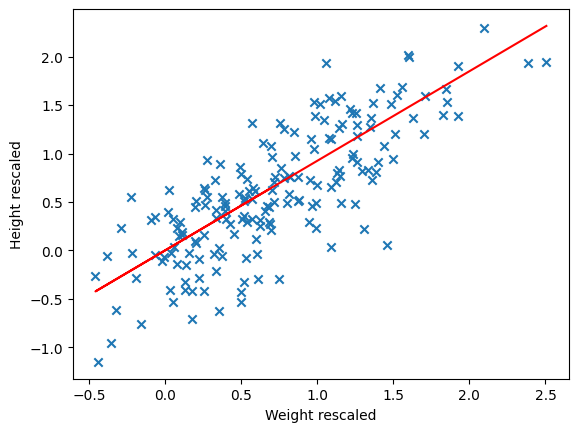

(array([[0.9247303]]), array([1.30366311e-05]))


In [21]:
weight_0 = np.random.normal(-1,1,(1,1))
intercept_0 = np.random.rand(1)

reg = LinearRegression(weight_0, intercept_0)
params = reg.fit(X_norm,y_norm, 0.1)
plt.scatter(X_norm[:180],y_norm[:180], marker="x")
pred = np.matmul(np.array(X_norm[:180]).reshape(-1,1),params[0])+params[1]
plt.plot(X_norm[:180],pred,'r')
plt.xlabel("Weight rescaled")
plt.ylabel("Height rescaled")
plt.show()
print(params)

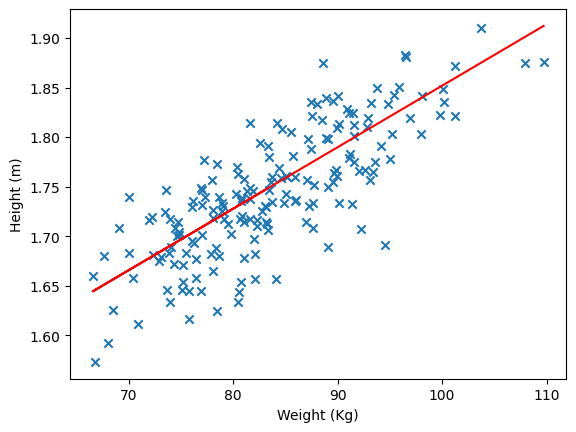

In [22]:
plt.scatter(X[:180],y[:180], marker="x")
new_m = std_height*params[0]/std_weight
new_q = params[1]*std_height - params[0]*std_height*mean_weight/std_weight + mean_height
pred = np.matmul(np.array(X[:180]).reshape(-1,1),new_m)+new_q
plt.plot(X[:180],pred,'r')
plt.xlabel("Weight (Kg)")
plt.ylabel("Height (m)")
plt.show()

## Logistic Regression

### A toy example

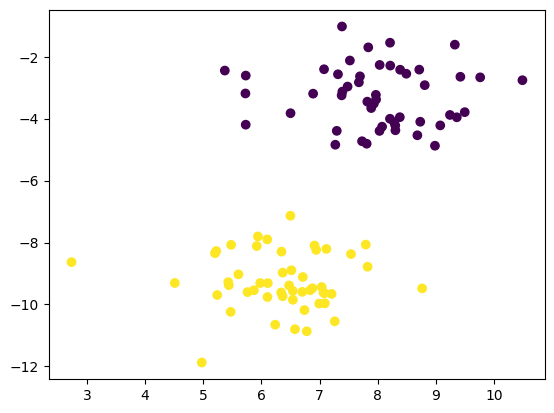

In [8]:
# load data
X = np.loadtxt("data/logistic_regression/toy_logistic_X.csv", delimiter = ",")
y = np.loadtxt("data/logistic_regression/toy_logistic_y.csv", delimiter = ",")
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [9]:
#FIXME: improve documentation and names
class LogisticRegression:
    
    def __init__ (self,n_iter,l_rate,random_state):
        
        self.n_iter=n_iter # number of itirations 
        self.l_rate=l_rate # learning rate
        self.random_state=random_state # random_state for weights generation
        
    def fit (self,X,y): # weights update process and cost monitoring 
        
        # for initial weights assignment I use numpy.random.RandomState which is a
        # container with number of methods for random numbers generation
        # drawn from a variety of probability distributions
        
        rgen=np.random.RandomState(self.random_state)
        
        # weights initialisation
        # normal (Gaussian) distribution is used with mean equals to 0.0 and std to 0.01 and size
        # corresponding to number of features + bias (intercept)
        
        self.w_=rgen.normal(loc=0.0,scale=0.01,size=X.shape[1]+1)
        
        self.cost_=[]
        
        for i in range(self.n_iter):
            
            output=(self.sigmoid(self.dot_product(X)))
            
            errors=(y-output) # error calculation
            
            self.w_[:2]+=self.l_rate*X.T.dot(errors) # weights update process
            
            self.w_[2]+=self.l_rate*errors.sum()
            
            cost = (-y.dot(np.log(output))-((1 - y).dot(np.log(1 - output)))) # cost function
            
            self.cost_.append(cost)
        
        return self
        
    def dot_product (self,X): 
        
        return np.dot(X,self.w_[:2])+self.w_[2]
        
    def sigmoid (self,z): # Sigmoid function
        
        return 1/(1+np.exp(-z))
        
    def predict (self,X): # Prediction function using np.where
        
        return np.where(self.sigmoid(self.dot_product(X))>=0.5,1,0)

In [10]:
X_train=X[:70]
X_test=X[70:]
y_train=y[:70]
y_test=y[70:]

print('mean_1:',X_train[:,0].mean(),X_test[:,0].mean())

print('mean_2:',X_train[:,1].mean(),X_test[:,1].mean())

mean_1: 7.241673064381469 6.989228461123589
mean_2: -6.090926073052087 -6.722102294328063


In [11]:
lr=LogisticRegression(n_iter=1000,l_rate=0.001,random_state=1)
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
print('Misclassifications:',(y_test!=y_pred).sum())

Misclassifications: 0


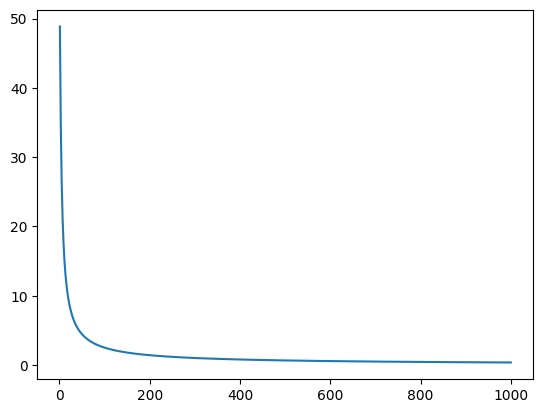

In [12]:
# Ploting cost value vs number of iterations
plt.plot(np.arange(1,len(lr.cost_)+1,1),lr.cost_)

In [13]:
# Finding slope and intercept for decission line ploting
slope=(0-(-lr.w_[2]/lr.w_[1]))/(-lr.w_[2]/lr.w_[0])
intercept=-lr.w_[2]/lr.w_[1]

print('slope:',slope,'intercept:',intercept)

slope: -0.8549748437092233 intercept: -0.08589867124742837


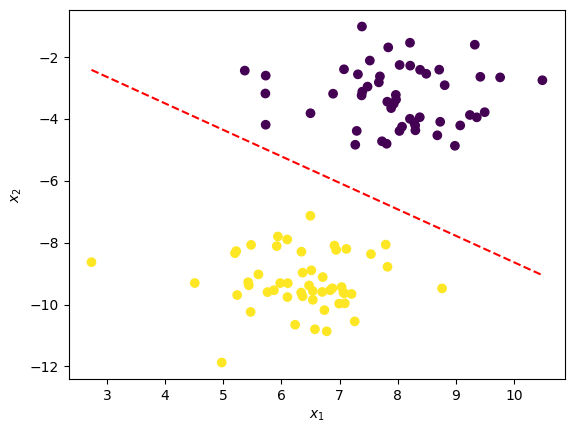

In [14]:
# Drawing decision boundary over the entire dataset
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(np.linspace(X[:,0].min(),X[:,0].max(),100),
        (np.linspace(X[:,0].min(),X[:,0].max(),100))*slope+intercept,'r--')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.savefig("linear_decision_boundary.png", dpi=200)
#plt.show()